In [ ]:
!pip install nibabel

In [ ]:
import nibabel as nib
import matplotlib.pyplot as plt
import numpy as np
import glob
import os
import shutil
from collections import Counter

In [ ]:
# максимальные и минимальные размеры
folder = "amos22\\amos22\\imagesTr"
files = sorted(glob.glob(folder + "/*.nii.gz"))
all_shapes = []
for file in files:
    vol = nib.load(file).get_fdata()
    all_shapes.append(vol.shape)

max_shape = np.max(all_shapes, axis=0)  
min_shape = np.min(all_shapes, axis=0)  
median_shape = np.median(all_shapes, axis=0)  

In [27]:
max_shape, min_shape, median_shape

(array([768, 768, 512]), array([192,  60,  64]), array([512., 512., 100.]))

In [ ]:
all_shapes = np.array(all_shapes)  

min_vol = np.array([512, 512, 80])  
colvo = np.all(all_shapes >= min_vol, axis=1)

total = len(files)
count = np.sum(colvo)

In [33]:
total

240

In [20]:
path = 'amos22\\amos22\\imagesTr\\amos_0111.nii.gz'
path_label = "amos22\\amos22\\labelsTr\\amos_0111.nii.gz"
image_volume = nib.load(path).get_fdata()
label_volume = nib.load(path_label).get_fdata()

In [21]:
image_volume.shape, label_volume.shape

((512, 512, 107), (512, 512, 107))

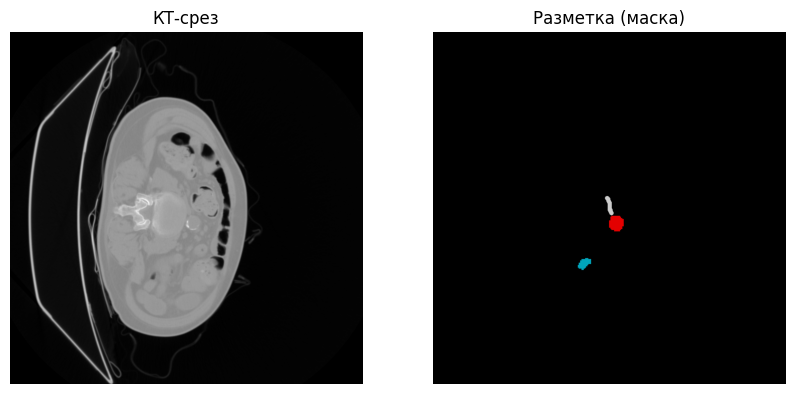

In [ ]:
slice = 50
fig, axes = plt.subplots(1, 2, figsize=(10, 5))
axes[0].imshow(image_volume[:, :, slice], cmap='gray')
axes[0].set_title('КТ-срез')
axes[0].axis('off')

axes[1].imshow(label_volume[:, :, slice])
axes[1].set_title('Разметка')
axes[1].axis('off')
plt.show()

In [ ]:
def filter_data(folder_img, folder_labels,  min_size=(512,512,86)):
    images = sorted(glob.glob(folder_img + "/*.nii.gz"))
    labels = sorted(glob.glob(folder_labels + "/*.nii.gz"))
    filtred = []
    filtred_labels = []

    for img_path, lbl_path in zip(images, labels):
        img = nib.load(img_path)
        shape = img.shape
        lbl = nib.load(lbl_path).get_fdata()
        unique_classes = np.unique(lbl)
        
        if len(unique_classes) >1 and all(s >= m for s,m in zip(shape, min_size)):
            filtred.append(img_path)
            filtred_labels.append(lbl_path)
    return filtred, filtred_labels

In [ ]:
filtered_imgs, filtered_lbls = filter_data(
        "amos22\\amos22\\imagesVa",
        "amos22\\amos22\\labelsVa",
        min_size=(512,512,85)
    )

In [ ]:
def copy_filter(filtered_imgs, filtered_lbls, output="amos_filtered"):

    images_dir = os.path.join(output, "imagesVaFil")
    labels_dir = os.path.join(output, "labelsVaFil")
    
    os.makedirs(images_dir, exist_ok=True)
    os.makedirs(labels_dir, exist_ok=True)
    
    for img_path, lbl_path in zip(filtered_imgs, filtered_lbls):
        img_name = os.path.basename(img_path)
        lbl_name = os.path.basename(lbl_path)
        
        new_img_path = os.path.join(images_dir, img_name)
        new_lbl_path = os.path.join(labels_dir, lbl_name)

        shutil.copy2(img_path, new_img_path)
        shutil.copy2(lbl_path, new_lbl_path)
        
    print(f"Img {images_dir}")
    print(f"Lbl {labels_dir}")
    
    return output

output_folder = copy_filter(filtered_imgs, filtered_lbls, 
                                       output_folder="amos_good_val_samples")

In [ ]:
def class_distribut(label_paths1, top_k):
    total_counts = Counter()
    total_voxels = 0
    label_paths = []
    label_paths.append(label_paths1[1])
    for path in label_paths:
        label_nii = nib.load(path)
        label_data = label_nii.get_fdata().astype(np.int32)
        total_voxels += label_data.size
        counts = Counter(label_data.flatten())
        total_counts.update(counts)
    
    print(f"Всего {total_voxels}")
    for cls, count in total_counts.most_common(top_k):
        per = count / total_voxels * 100
        print(f"Класс {cls}: {count} вокселей ({per:.2f}%)")
    
    return total_counts


class_counts = class_distribut(filtered_lbls, 20)

27262976
Всего 27262976

Класс 0: 26485837 вокселей (97.15%)  
Класс 6: 413336 вокселей (1.52%)  
Класс 1: 68435 вокселей (0.25%)  
Класс 7: 59994 вокселей (0.22%)  
Класс 2: 41774 вокселей (0.15%)  
Класс 3: 40910 вокселей (0.15%)  
Класс 14: 34245 вокселей (0.13%)  
Класс 9: 33709 вокселей (0.12%)  
Класс 8: 25565 вокселей (0.09%)  
Класс 10: 20785 вокселей (0.08%)  
Класс 13: 17292 вокселей (0.06%)  
Класс 15: 8644 вокселей (0.03%)  
Класс 4: 5216 вокселей (0.02%)  
Класс 5: 4438 вокселей (0.02%)  
Класс 12: 1584 вокселей (0.01%)  
Класс 11: 1212 вокселей (0.00%)  